# Neural Encoding Simulation Toolkit | In silico EEG Data Tutorial

In this tutorial you will familiarize with the [Neural Encoding Simulation Toolkit (NEST)][nest], consisting of trained encoding models of the brain that you can use to generate of in silico neural responses to stimuli of your choice. Through the [`NEST` Python package][github], you will use these trained encoding models to generate fMRI responses to images.

For more information on NEST refer to the [data manual][data_manual]. The code used to create NEST, along with its utility functions, is available on [GitHub][github].

You can run this tutorial either on [Colab][colab], or on [Jupyter Notebook][jupyter]. If you experience problems with the code, please get in touch with Ale (alessandro.gifford@gmail.com).

If you use the code and/or data from this tutorial, please cite:

> *Gifford AT, Bersch D, Roig G, Cichy RM. 2025. The Neural Encoding Simulation Toolkit. In preparation. https://github.com/gifale95/NEST*

[nest]: https://www.alegifford.com/projects/nest/
[data_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit?usp=drive_link
[github]: https://github.com/gifale95/NEST
[colab]: https://colab.research.google.com/drive/1W9Sroz2Y0eTYfyhVrAJwe50GGHHAGBdE?usp=sharing
[jupyter]: https://github.com/gifale95/NEST/blob/main/tutorials/nest_fmri_tutorial.ipynb

# 0 | Configuration

Note that in sections `0.1 Install and import the necessary Python libraries` and `0.2 Access NEST` you will have to run different code cells based on whether you are running the tutorial on Colab or on Jupyter Notebook. An `if statement` will take care of this. You only need to select `'colab'` or `'jupyter_notebook'` for the `platform` variable below.

In [1]:
# Select platform
platform = "colab" # @param ["colab", "jupyter_notebook"]

## 0.1 | Install and import the necessary Python libraries

### 0.1.1 | Install libraries, Google Colab

If you are running the tutorial on Google Colab, you just need to install the [NEST Python package][nest_git].

[nest_git]: https://github.com/gifale95/NEST

In [2]:
!pip install -U git+https://github.com/gifale95/NEST.git

  Cloning https://github.com/gifale95/NEST.git to /tmp/pip-req-build-hmxusfa9
  Running command git clone --filter=blob:none --quiet https://github.com/gifale95/NEST.git /tmp/pip-req-build-hmxusfa9
  Resolved https://github.com/gifale95/NEST.git to commit eed7d3fa64b0af4e2497ecca299bb746729fdfa5
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━

### 0.1.2 | Install libraries, Jupyter Notebook

If you are running the tutorial on Jupyter Notebook, you need to install the following libraries before running the tutorial:

[h5py][h5py], [jupyter][jupyter], [matplotlib][matplotlib], [nest][nest_git], [nibabel][nibabel], [numpy][numpy], [pillow][pil], [torchvision][torchvision], [tqdm][tqdm].

[h5py]: https://docs.h5py.org/en/stable/
[jupyter]: https://jupyter.org/
[matplotlib]: https://matplotlib.org/stable/index.html
[nest_git]: https://github.com/gifale95/NEST
[nibabel]: https://nipy.org/nibabel/
[numpy]: https://numpy.org/
[pil]: https://pypi.org/project/pillow/
[torchvision]: https://pytorch.org/vision/stable/index.html
[tqdm]: https://tqdm.github.io/

### 0.1.3 | Import the libraries

Once you have installed all necessary libraries, import them with the following code.

In [10]:
import h5py
import matplotlib
from matplotlib import pyplot as plt
from nest import NEST
import nibabel as nib
import numpy as np
import os
from PIL import Image
import torchvision
from torchvision import transforms as trn
from tqdm import tqdm

## 0.2 | Access NEST

### 0.2.1 | Access NEST on Google Colab

If you are running the tutorial on Google Colab you can use NEST from the Google Drive public folder called [`neural_encoding_simulation_toolkit`][nest]. Before running the tutorial code you need to right-click on this folder, and select `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can read the content after mounting using `drive.mount()`. Finally, edit the `nest_dir` variable below with the path on your Drive to the `neural_encoding_simulation_toolkit` shortcut folder.

<font color='red'><b>NOTE:</b></font> **You need to manually create the data shortcut yourself, as the code cell below won't do this for you.**

[nest]: https://forms.gle/ZKxEcjBmdYL6zdrg9

In [4]:
if platform == 'colab':
    from google.colab import drive
    drive.mount('/content/drive/', force_remount=True)
    nest_dir = '/content/drive/MyDrive/neural_encoding_simulation_toolkit' #@param {type:"string"}

Mounted at /content/drive/


### 0.2.2 | Access NEST on Jupyter Notebook

If you are running the tutorial on Jupyter Notebook you first need to download NEST from the public Google Drive folder [`neural_encoding_simulation_toolkit`][data], and then edit the `nest_dir` variable below with the path to the downloaded and unzipped data folder.

Note that the `neural_encoding_simulation_toolkit` folder contains several GBs of data, and thus the download might take a while. However, based on your needs you might choose to download only a part of it. [NEST's data manual][nest_manual] provides a detailed description of NEST's content, which will help you in this choice.

We recommend downloading NEST directly from Google Drive via terminal using [Rclone][rclone]. [Here][guide] is a step-by-step guide for how to install and use Rclone to move files to and from your Google Drive. Before downloading NEST via terminal you need to add a shortcut of the `neural_encoding_simulation_toolkit` folder to your Google Drive. You can do this by right-clicking on the `neural_encoding_simulation_toolkit` folder, and selecting `Organise` → `Add shortcut`. This will create a shortcut (without copying or taking space) of the folder to a desired path in your Google Drive, from which you can download its content.

[data]: https://forms.gle/ZKxEcjBmdYL6zdrg9
[nest_manual]: https://docs.google.com/document/d/1DeQwjq96pTkPEnqv7V6q9g_NTHCjc6aYr6y3wPlwgDE/edit#heading=h.n2idexbb49xj
[rclone]: https://rclone.org/
[guide]: https://noisyneuron.github.io/nyu-hpc/transfer.html

In [ ]:
if platform == 'jupyter_notebook':
    nest_dir = '../neural_encoding_simulation_toolkit'

---
---

# 1 | Initialize NEST

## 1.1 | Create the NEST object

To use the NEST package, you first need to create a `NEST` object, providing the path to the Neural Encoding Simulation Toolkit directory. This object will be the instance through which you can generate in-silico brain responses.

In [11]:
# Initialize the NEST object with the path to the toolkit directory
nest_object = NEST(nest_dir)

## 1.2 | Browse the available encoding models

Let's explore what's available in the NEST toolkit. Each model has a unique ID with a naming pattern `modality_dataset_model`.




In [12]:
# List all available models and their versions
available_models = nest_object.list_models()
print(f"Available models: {available_models}")

Available models: ['fmri_nsd_fwrf', 'eeg_things_eeg_2_vit_b_32']


You can also view the modalities and datasets in a more structured format:

In [13]:
# Get a hierarchical view of available models by modality and dataset
catalog = nest_object.get_model_catalog(print_format=True)
print(f"Model Catalog as Dict: {catalog}")

Available Modalities and Datasets:
• EEG
  └─ things_eeg_2

• FMRI
  └─ NSD

Model Catalog as Dict: {'fmri': ['NSD'], 'eeg': ['things_eeg_2']}


The `print_format=True` parameter displays a nicely formatted hierarchical view in the console, making it easy to browse what's available.

## 1.3 | Detailed model information for selected models

For this tutorial, we'll focus on the encoding model trained on **THINGS EEG2** dataset.
Nnote that the EEG data used to train and evaluate these encoding models were z-scored at each recording session. As a consequence, their generated in silico EEG responses also live in z-scored space.

Let's get comprehensive information about what this model does and how to use it with `.describe()`:

In [15]:
# Get comprehensive information about the EEG model
model_id = "eeg_things_eeg_2_vit_b_32"  
model_info = nest_object.describe(model_id)

🧠 Model: eeg_things_eeg_2_vit_b_32

Modality: eeg
Dataset: things_eeg_2
Features: vision transformer (ViT-B/32)
Repeats: multi
Subject specific: True

📋 Description:
This model generates in silico EEG responses to visual stimuli using a vision
transformer model. It was trained on the THINGS-EEG-2 dataset, which contains
EEG recordings from subjects viewing images of everyday objects. The model
extracts visual features using a pre-trained ViT-B/32 transformer, applies
dimensionality reduction, and then predicts EEG responses across all channels
and time points.  The model takes as input a batch of RGB images in the shape
[batch_size, 3, height, width], with pixel values ranging from 0 to 255 and
square dimensions (e.g., 224×224).

📥 Input:
  Type: numpy.ndarray
  Shape: ['batch_size', 3, 'height', 'width']
  Description: The input should be a batch of RGB images.
  Constraints:
    • Image values should be integers in range [0, 255]
    • Image dimensions (height, width) should be equal

The `describe()` function provides all the essential information needed to work with the model, including:

* **Basic Information:** Details about the modality (EEG), dataset (THINGS EEG), and features (ViT)
* **Description:** How the model works and what it does
* **Input Requirements:** Format specifications for images (dimensions, type, etc.)
* **Output Format:** The structure and meaning of the model's predictions
* **Parameters:** Required and optional arguments for functions like `get_encoding_model()`
* **Performance Information:** Metrics on how well the model performs
* **Usage Examples:** Code snippets showing how to use the model

This information will help you understand how to properly set up and use the model in the following sections.

# 2 | Generate in silico EEG responses to images
    
Now we'll use NEST to generate predicted EEG responses to visual stimuli.

## 2.1 | Load and prepare the images for which the in silico EEG responses are generated

The `eeg_things_eeg_2_vit_b_32` encoding models expect images in a specific format: a 4D numpy array with shape (Batch size × 3 RGB Channels × Width × Height) and integer values in the range [0, 255]. The images must also be square (equal width and height), so we'll center crop them during loading.

In [16]:
images_dir = os.path.join(nest_dir, 'nest_tutorials', 'tutorial_images')
images_list = os.listdir(images_dir)
images_list.sort()
    
images = []
for img in tqdm(images_list):
    img_dir = os.path.join(images_dir, img)
    img = Image.open(img_dir).convert('RGB')
    # Center crop the images to square format, and resize them
    transform = trn.Compose([
        trn.CenterCrop(min(img.size)),
        trn.Resize((227,227))
    ])
    img = transform(img)
    img = np.asarray(img)
    img = img.transpose(2,0,1)
    images.append(img)
images = np.asarray(images)

# Print the images dimensions
print('\n\nImages shape:')
print(images.shape)
print('(Batch size × 3 RGB Channels x Width x Height)')

100%|██████████| 100/100 [00:00<00:00, 309.89it/s]



Images shape:
(100, 3, 227, 227)
(Batch size × 3 RGB Channels x Width x Height)


Let's visualize one of the loaded images to ensure everything looks correct:

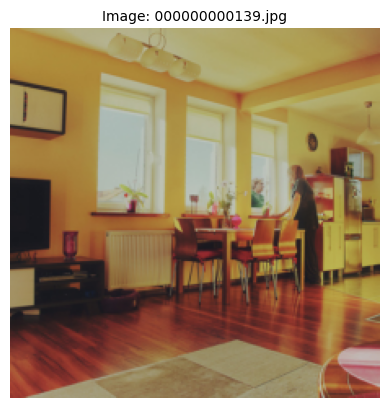

In [17]:
# Choose the image you would like to visualize
img_num = 0 # @param {type:"slider", min:0, max:99, step:1}

# Plot the image
plt.figure()
plt.axis('off')
plt.imshow(images[img_num].transpose(1,2,0))
plt.title('Image: ' + images_list[img_num], fontsize=10);

## 2.2 | Generate in silico EEG responses to images

Now we'll generate predicted EEG responses for our images. This is a two-step process:

1. First, we load a specific encoding model with `get_encoding_model()`
2. Then, we use `encode()` to generate predictions for our images

Let's set up the parameters for our model:

In [18]:
# Choose the model ID
model_id = "eeg_things_eeg_2_vit_b_32"

# Select the Subject number
subject = 1 # @param ["1", "2", "3", "4", "5", "6", "7", "8", "9", "10"] {type:"raw", allow-input: true}
print('Subject: ' + str(subject))



Subject: 1


In [19]:
# Step 1: Load the encoding model for our chosen subjec
eeg_encoding_model = nest_object.get_encoding_model(
    model_id=model_id,
    subject=subject,
    device='auto'
)

# Step 2: Generate in silico EEG responses for our images
insilico_eeg, insilico_eeg_metadata = nest_object.encode(
    eeg_encoding_model,
    images,
    return_metadata=True
)

Model loaded on cpu for subject 1


Encoding EEG responses: 100%|██████████| 1/1 [00:01<00:00,  1.90s/it, Encoded images=100, Total images=100]


Let's examine the shape of our results:

In [20]:
# Print the in silico EEG data dimensions
print('In silico EEG data shape:')
print(insilico_eeg.shape)
print('(Images x Repetitions x Channels x Time points)')

In silico EEG data shape:
(100, 4, 63, 140)
(Images x Repetitions x Channels x Time points)


# 3 | In silico EEG responses metadata

The in silico fMRI responses come with useful metadata that helps us understand and analyze the results. You can access this metadata either by setting `return_metadata=True` in the `encode()` function (as we did above), or by using the `get_metadata()` method on the encoding model:

In [21]:
# Get metadata directly from the model
insilico_eeg_metadata = eeg_encoding_model.get_metadata()

The metadata consists of a dictionary with two keys:
* `eeg`: metadata relative to the EEG responses used to train the encoding models.
* `encoding_models`: metadata relative to the trained EEG encoding models.

## 3.1 | EEG metadata

Here you will familiarize with the metadata from the `eeg` key, that is, metadata relative to the EEG responses used to train the encoding models.

### 3.1.1 | EEG channels

The `ch_names` variable is a list of length (Channels), where each list element indicates the name of a given EEG channel.

In [22]:
# Print the EEG channels
print('\nEEG channels:')
for c, chan in enumerate(insilico_eeg_metadata['eeg']['ch_names']):
    print(c, chan)


EEG channels:
0 Fp1
1 F3
2 F7
3 FT9
4 FC5
5 FC1
6 C3
7 T7
8 TP9
9 CP5
10 CP1
11 Pz
12 P3
13 P7
14 O1
15 Oz
16 O2
17 P4
18 P8
19 TP10
20 CP6
21 CP2
22 Cz
23 C4
24 T8
25 FT10
26 FC6
27 FC2
28 F4
29 F8
30 Fp2
31 AF7
32 AF3
33 AFz
34 F1
35 F5
36 FT7
37 FC3
38 FCz
39 C1
40 C5
41 TP7
42 CP3
43 P1
44 P5
45 PO7
46 PO3
47 POz
48 PO4
49 PO8
50 P6
51 P2
52 CPz
53 CP4
54 TP8
55 C6
56 C2
57 FC4
58 FT8
59 F6
60 F2
61 AF4
62 AF8


### 3.1.2 | EEG time points

The `time` variable is a 1-D array of length (Time points), where each vector component indicates the timing of a given EEG time point, in seconds, with respect to stimulus onset.

In [23]:
# Print the EEG time points
print('\nEEG time points (in seconds):')
for t, time in enumerate(insilico_eeg_metadata['eeg']['times']):
    print(t, np.round(time, decimals=3))


EEG time points (in seconds):
0 -0.1
1 -0.095
2 -0.09
3 -0.085
4 -0.08
5 -0.075
6 -0.07
7 -0.065
8 -0.06
9 -0.055
10 -0.05
11 -0.045
12 -0.04
13 -0.035
14 -0.03
15 -0.025
16 -0.02
17 -0.015
18 -0.01
19 -0.005
20 0.0
21 0.005
22 0.01
23 0.015
24 0.02
25 0.025
26 0.03
27 0.035
28 0.04
29 0.045
30 0.05
31 0.055
32 0.06
33 0.065
34 0.07
35 0.075
36 0.08
37 0.085
38 0.09
39 0.095
40 0.1
41 0.105
42 0.11
43 0.115
44 0.12
45 0.125
46 0.13
47 0.135
48 0.14
49 0.145
50 0.15
51 0.155
52 0.16
53 0.165
54 0.17
55 0.175
56 0.18
57 0.185
58 0.19
59 0.195
60 0.2
61 0.205
62 0.21
63 0.215
64 0.22
65 0.225
66 0.23
67 0.235
68 0.24
69 0.245
70 0.25
71 0.255
72 0.26
73 0.265
74 0.27
75 0.275
76 0.28
77 0.285
78 0.29
79 0.295
80 0.3
81 0.305
82 0.31
83 0.315
84 0.32
85 0.325
86 0.33
87 0.335
88 0.34
89 0.345
90 0.35
91 0.355
92 0.36
93 0.365
94 0.37
95 0.375
96 0.38
97 0.385
98 0.39
99 0.395
100 0.4
101 0.405
102 0.41
103 0.415
104 0.42
105 0.425
106 0.43
107 0.435
108 0.44
109 0.445
110 0.45
111 0.455
1

## 3.2 | Encoding models metadata

Now you will familiarize with the metadata from the `encoding_models` key, that is, metadata relative to the trained EEG encoding models.

### 3.2.1 | Encoding models encoding accuracy

For each THINGS EEG2 subject, we trained the encoding models using 16,540 images, and tested them on 200 images. We used the trained encoding models to generate the in silico EEG responses for the 200 test images, and compared these in silico EEG responses to the ground truth (real) EEG responses through a Pearson correlation. We correlated ground-truth and in silico EEG responses independently for each EEG channel and time point (across the 200 test images), resulting in one encoding accuracy score for each channel and time point.

Since EEG channels can be grouped based on their position (e.g., occipital, parietal, temporal, central, frontal), here you can choose whether to plot the encoding accuracy for all of the EEG channels, or only for the ones coming from a specific channel group.

In [24]:
# Choose the EEG channels to keep
kept_channels = "occipital" # @param ["occipital", "parietal", "temporal", "central", "frontal", "all"] {allow-input: true}

# Channels selection
if kept_channels != 'all':
	ch_names_kept = []
	idx_ch = []
	for c, chan in enumerate(insilico_eeg_metadata['eeg']['ch_names']):
		if kept_channels[0].upper() in chan:
			ch_names_kept.append(chan)
			idx_ch.append(c)
	idx_ch = np.asarray(idx_ch)
elif kept_channels == 'all':
	ch_names_kept = insilico_eeg_metadata['eeg']['ch_names']
	idx_ch = np.arange(0, len(insilico_eeg_metadata['eeg']['ch_names']))

print('\nKept EEG channels:')
for c, chan in enumerate(ch_names_kept):
    print(c, chan)


Kept EEG channels:
0 O1
1 Oz
2 O2
3 PO7
4 PO3
5 POz
6 PO4
7 PO8


Now you will plot the encoding accuracy averaged across the EEG channels from the chosen channel group, against the (split-half) noise ceiling lower and upper bounds (denoted by the gray region).

Since there are 4 repetitions (i.e., instances) of in silico EEG responses you will plot the correlation score of the ground truth EEG response against each single in silico EEG repetition (black dashed lines), as well as the correlation score of the ground truth EEG response against the average over the 4 in silico EEG repetitions (pink solid line).

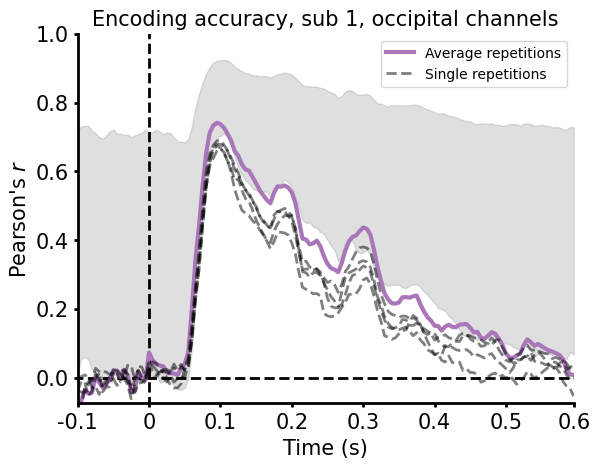

In [25]:
# Get the encoding accuracy results
encoding_acc_all_rep = np.mean(insilico_eeg_metadata['encoding_models']\
    ['encoding_accuracy']['correlation_all_repetitions'][idx_ch], 0)
encoding_acc_single_rep = np.mean(insilico_eeg_metadata['encoding_models']\
    ['encoding_accuracy']['correlation_single_repetitions'][:,idx_ch], 1)
noise_ceiling_low = np.mean(insilico_eeg_metadata['encoding_models']\
    ['encoding_accuracy']['noise_ceiling_lower'][idx_ch], 0)
noise_ceiling_up = np.mean(insilico_eeg_metadata['encoding_models']\
    ['encoding_accuracy']['noise_ceiling_upper'][idx_ch], 0)
times = insilico_eeg_metadata['eeg']['times']

# Plot parameters
fontsize = 15
matplotlib.rcParams['font.sans-serif'] = 'DejaVu Sans'
matplotlib.rcParams['font.size'] = fontsize
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
matplotlib.rcParams['axes.linewidth'] = 2
matplotlib.rcParams['xtick.major.width'] = 2
matplotlib.rcParams['xtick.major.size'] = 3
matplotlib.rcParams['ytick.major.width'] = 2
matplotlib.rcParams['ytick.major.size'] = 3
matplotlib.rcParams['axes.spines.left'] = True
matplotlib.rcParams['axes.spines.bottom'] = True
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams['lines.markersize'] = 3
colors = [(170/255, 118/255, 186/255)]
color_noise_ceiling = (150/255, 150/255, 150/255)

# Plot the channel-average encoding accuracy
plt.plot()
plt.plot([-10, 10], [0, 0], 'k--', [0, 0], [100, -100], 'k--', linewidth=2,
    label='_nolegend_')
plt.fill_between(times, noise_ceiling_low, noise_ceiling_up,
    color=color_noise_ceiling, alpha=.3, label='_nolegend_')
plt.plot(times, encoding_acc_all_rep, color=colors[0], linewidth=3,
    label='Average repetitions')
for r, res in enumerate(encoding_acc_single_rep):
    if r == 0:
        plt.plot(times, res, '--', color='k', linewidth=2, alpha=0.5,
            label='Single repetitions')
    else:
        plt.plot(times, res, '--', color='k', linewidth=2, alpha=0.5,
            label='_nolegend_')
plt.ylabel('Pearson\'s $r$', fontsize=fontsize)
plt.ylim(bottom=-.075, top=1)
plt.xlabel('Time (s)', fontsize=fontsize)
xticks = [-0.1, 0, .1, .2, .3, .4, .5, times[-1]]
xlabels = [-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
plt.xticks(ticks=xticks, labels=xlabels)
plt.xlim(left=min(times), right=max(times));
title = 'Encoding accuracy, sub ' +str(subject) + ', ' + kept_channels + \
    ' channels'
plt.title(title, fontsize=fontsize)
plt.legend(fontsize=fontsize-5);

### 3.2.2 | Encoding models train/val/test split

Finally, here you will plot the image names of the THINGS images used to train (`train_img_files`) and test (`test_img_files`) the encoding model for the chosen subject.

In [26]:
# Training images
train_images = insilico_eeg_metadata\
    ['encoding_models']['train_test_things_image_splits']['train_img_files']
print('Training image number: ' + str(len(train_images)))
print('Training image files:')
print(train_images)

# Test image images
test_images = insilico_eeg_metadata\
    ['encoding_models']['train_test_things_image_splits']['test_img_files']
print('\n\nTest image number: ' + str(len(test_images)))
print('Test image files:')
print(test_images)

Training image number: 16540
Training image files:
['aardvark_01b.jpg', 'aardvark_02s.jpg', 'aardvark_03s.jpg', 'aardvark_04s.jpg', 'aardvark_05s.jpg', 'aardvark_06s.jpg', 'aardvark_07s.jpg', 'aardvark_08s.jpg', 'aardvark_09s.jpg', 'aardvark_10s.jpg', 'abacus_01b.jpg', 'abacus_02s.jpg', 'abacus_03s.jpg', 'abacus_04s.jpg', 'abacus_05s.jpg', 'abacus_06s.jpg', 'abacus_07s.jpg', 'abacus_08s.jpg', 'abacus_09s.jpg', 'abacus_10s.jpg', 'accordion_01b.jpg', 'accordion_02s.jpg', 'accordion_03s.jpg', 'accordion_04s.jpg', 'accordion_05s.jpg', 'accordion_06s.jpg', 'accordion_07s.jpg', 'accordion_08s.jpg', 'accordion_09s.jpg', 'accordion_10s.jpg', 'acorn_01b.jpg', 'acorn_02n.jpg', 'acorn_03s.jpg', 'acorn_04s.jpg', 'acorn_05s.jpg', 'acorn_06s.jpg', 'acorn_07s.jpg', 'acorn_08s.jpg', 'acorn_09s.jpg', 'acorn_10s.jpg', 'air_conditioner_01b.jpg', 'air_conditioner_02s.jpg', 'air_conditioner_03s.jpg', 'air_conditioner_04s.jpg', 'air_conditioner_05s.jpg', 'air_conditioner_06s.jpg', 'air_conditioner_07s.jpg',